In [1]:
import ffn 
from empyrical import alpha_beta
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation
import matplotlib as pyplot
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [16]:
prices = ffn.get('msft,aapl,amzn,fb,brk-b,jnj,mmm', start='2017-10-01',end='2019-10-01')

In [3]:
prices.head()

,msft,aapl,amzn,fb,brkb,jnj
Date,,,,,,
2019-04-01,117.786697,189.217209,1814.189941,168.699997,205.000000,136.066147
2019-04-02,117.954941,191.967804,1813.979980,174.199997,203.880005,134.822784
2019-04-03,118.726852,193.283737,1820.699951,173.539993,203.669998,134.294113
2019-04-04,118.123177,193.620117,1818.859985,176.020004,204.100006,132.727661
2019-04-05,118.647690,194.916260,1837.280029,175.720001,205.330002,133.324860


In [11]:
benchmark = ffn.get('spy', start='2017-10-01',end='2019-10-01')
benchmark.head()

,spy
Date,
2017-10-02,242.967758
2017-10-03,243.487747
2017-10-04,243.776627
2017-10-05,245.221039
2017-10-06,244.941757


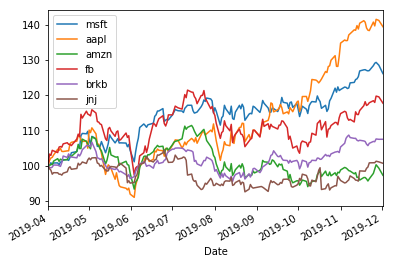

In [5]:
prices.rebase().plot()

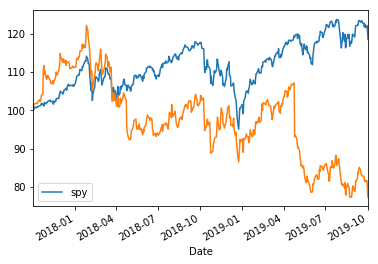

In [17]:
msft = ffn.get('mmm', start='2017-10-01',end='2019-10-01')
benchmark.rebase().plot()
prices['mmm'].rebase().plot()

In [19]:
alpha, beta = alpha_beta(prices['mmm'], benchmark)
print(beta)

-0.6855683443313096


C:\Users\samra\Anaconda3\lib\site-packages\empyrical\stats.py:1294: RuntimeWarning: overflow encountered in power
  out=out


In [18]:
stats = prices.calc_stats()

In [19]:
stats.display()

Stat                 msft        aapl        amzn        fb          brkb        jnj
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2019-04-01  2019-04-01  2019-04-01  2019-04-01  2019-04-01  2019-04-01
End                  2019-11-18  2019-11-18  2019-11-18  2019-11-18  2019-11-18  2019-11-18
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         27.20%      41.16%      -3.40%      17.01%      7.00%       -1.59%
Daily Sharpe         1.98        2.30        -0.17       1.06        0.83        -0.04
Daily Sortino        3.31        3.80        -0.26       1.71        1.33        -0.06
CAGR                 46.30%      72.47%      -5.32%      28.20%      11.29%      -2.50%
Max Drawdown         -7.90%      -17.84%     -15.61%     -16.02%     -10.43%     -11.45%
Calmar Ratio         5.86        4.06        -0.34       1.76        1.08        -0.22

MTD                  4.8

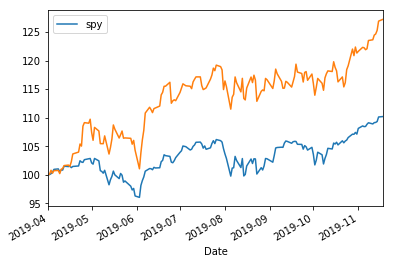

In [20]:
benchmark.rebase().plot()
prices['msft'].rebase().plot()

In [22]:
alpha, beta = alpha_beta(msft, benchmark)
print(beta)

0.7690811130241649


In [13]:
temp = ffn.get('spy', start='2018-10-01')